In [4]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')

**Data Understanding**

In [5]:


df = pd.read_csv('/kaggle/input/d/mirichoi0218/insurance/insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape


(1338, 7)

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [11]:
list(df.sex.unique())

['female', 'male']

 **Data Cleaning**

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Missing Data Visulization**

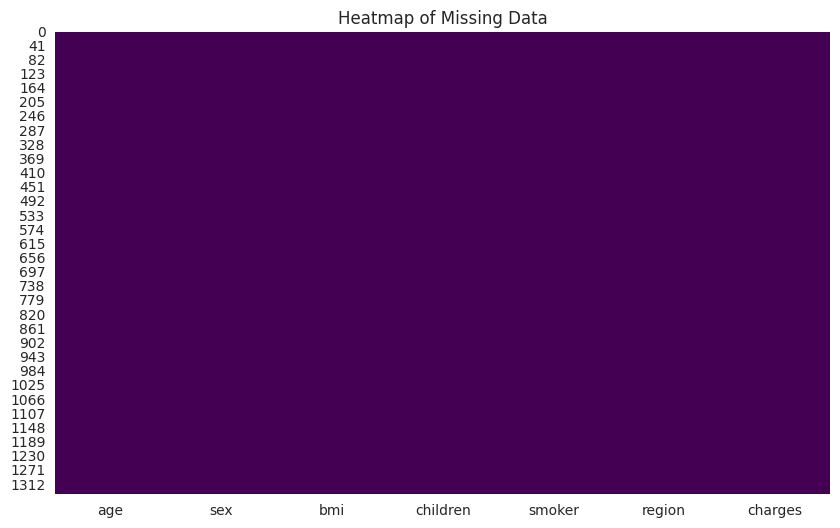

In [13]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create heatmap of missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Heatmap of Missing Data')
plt.show()

In [14]:
#  5. Handling Missing Data

# Example: Fill numeric with median, categorical with mode
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Check again
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [15]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
df.drop_duplicates(keep='first',inplace=True)

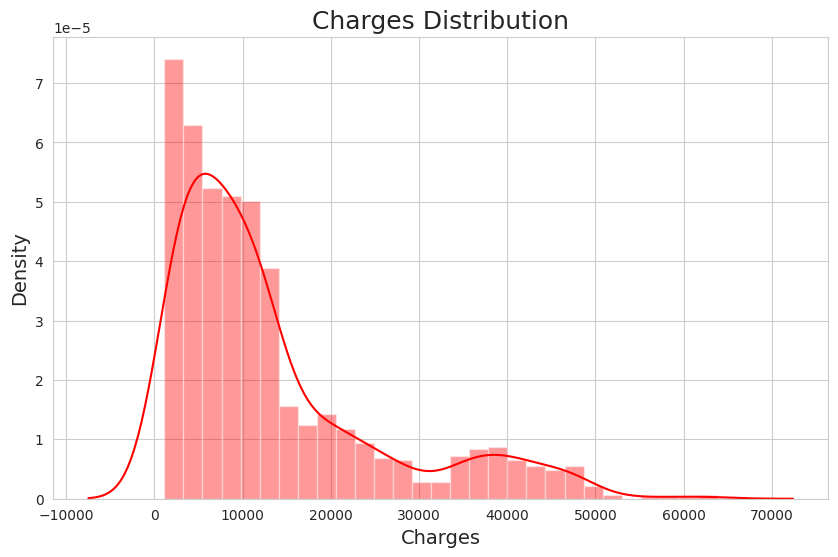

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(df.charges,color='r')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

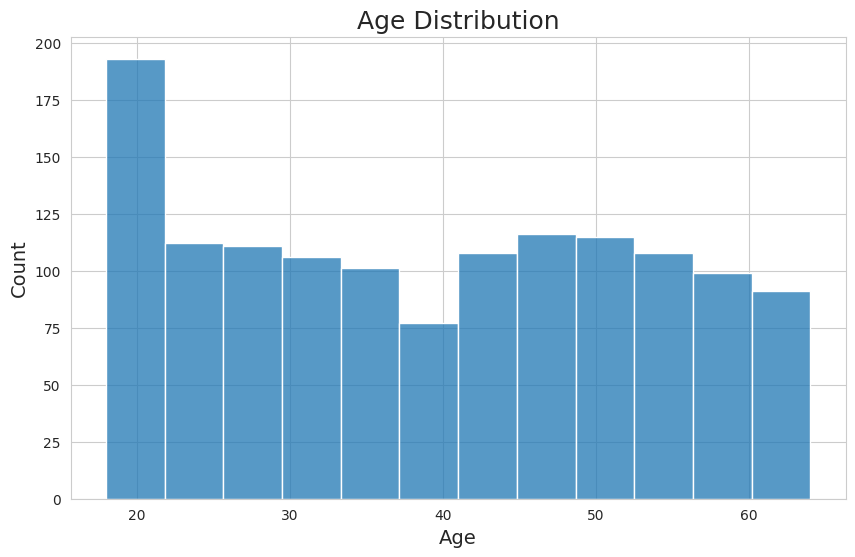

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

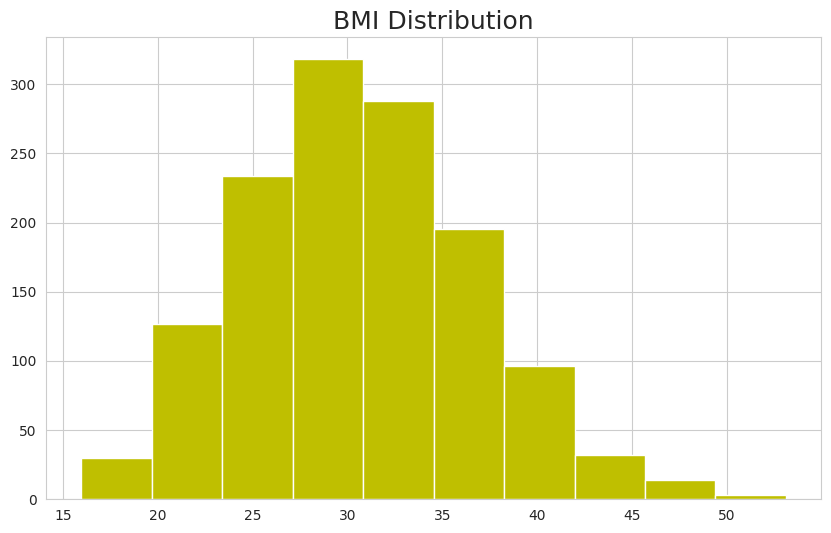

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df.bmi,color='y')
plt.title('BMI Distribution',size=18)
plt.show()

Plots for categorical variables


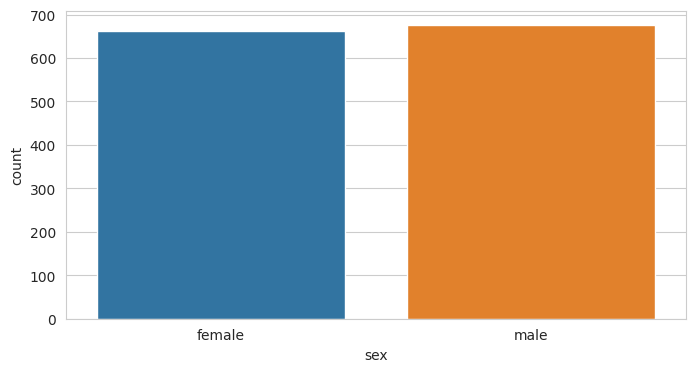

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x='sex', data=df)
plt.show()


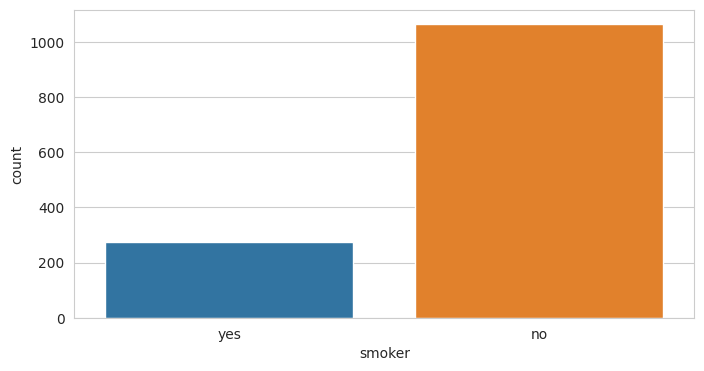

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(x='smoker', data=df)
plt.show()

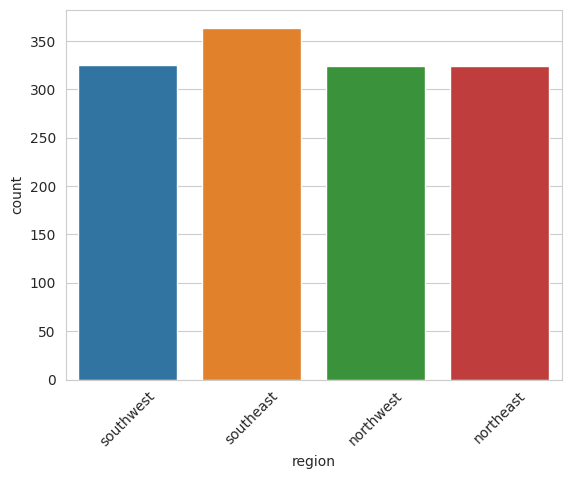

In [22]:
sns.countplot(x='region', data=df)
plt.xticks(rotation=45)
plt.show()

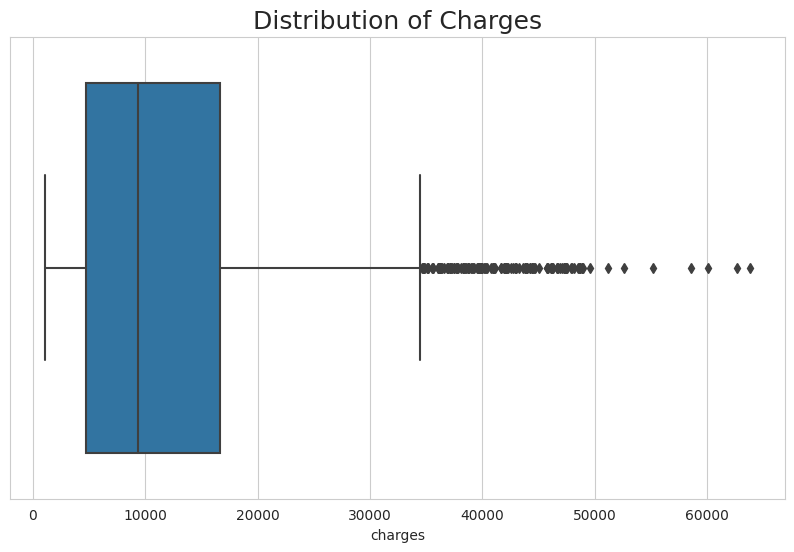

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['charges'])
plt.title('Distribution of Charges', size=18)
plt.show()


In [24]:
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

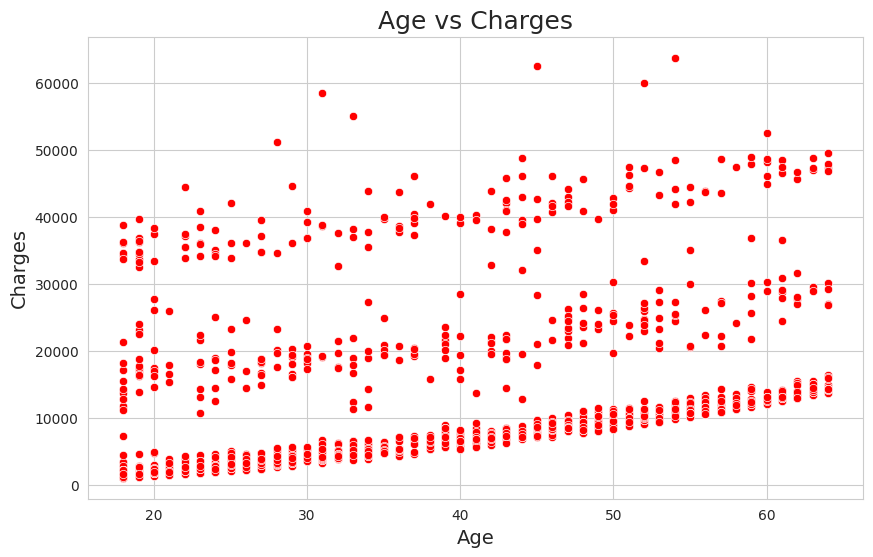

In [25]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='age',y='charges',color='r',data=df)
plt.title('Age vs Charges',size=18)
plt.xlabel('Age',size=14)
plt.ylabel('Charges',size=14)
plt.show()

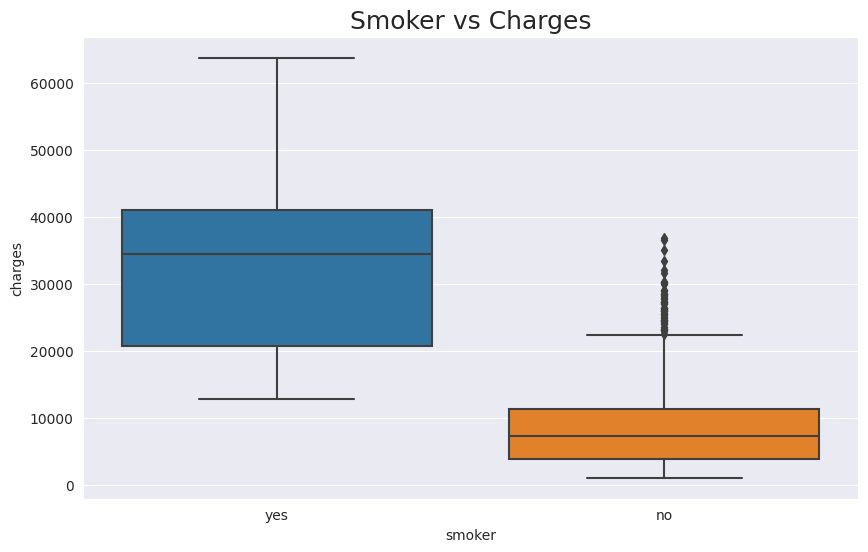

In [26]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='smoker',y='charges',data=df)
plt.title('Smoker vs Charges',size=18);

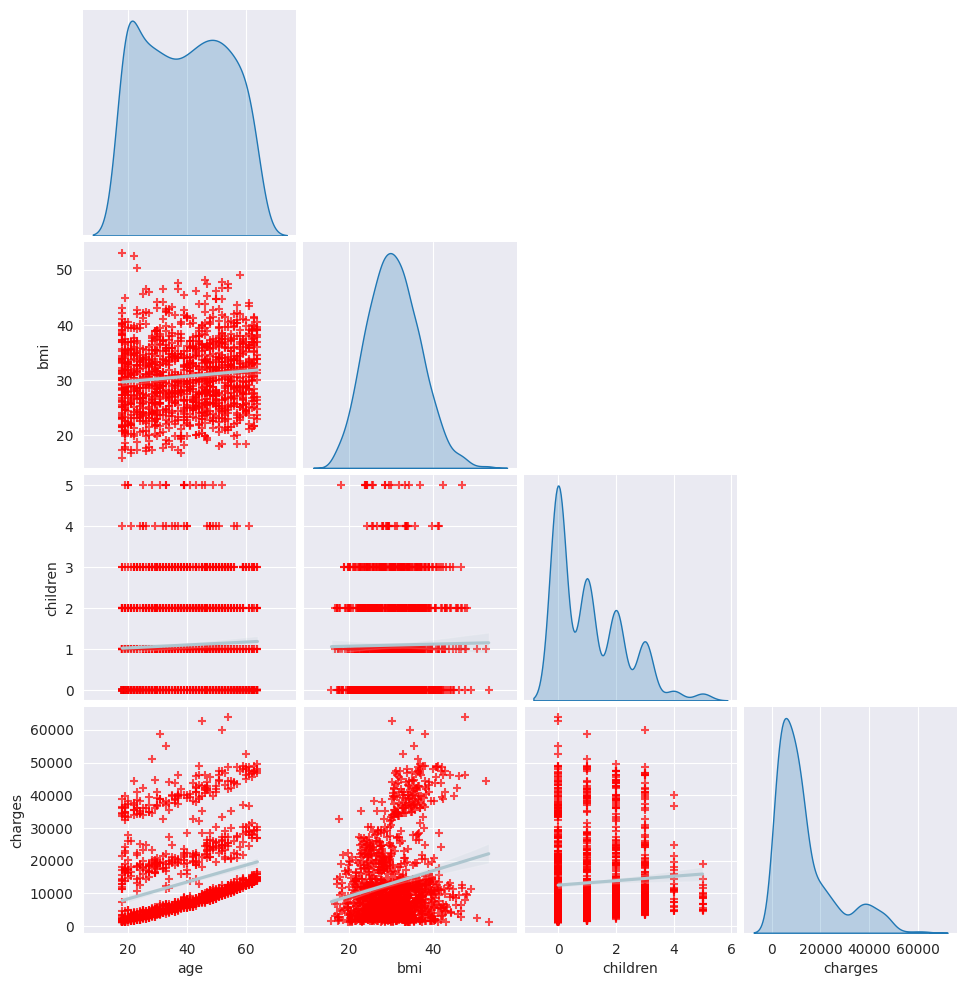

In [27]:
sns.pairplot(df, 
                 markers="+",
                 diag_kind="kde",
                 kind='reg',
                 plot_kws={'line_kws':{'color':'#aec6cf'}, 
                           'scatter_kws': {'alpha': 0.7, 
                                           'color': 'red'}},
                 corner=True);

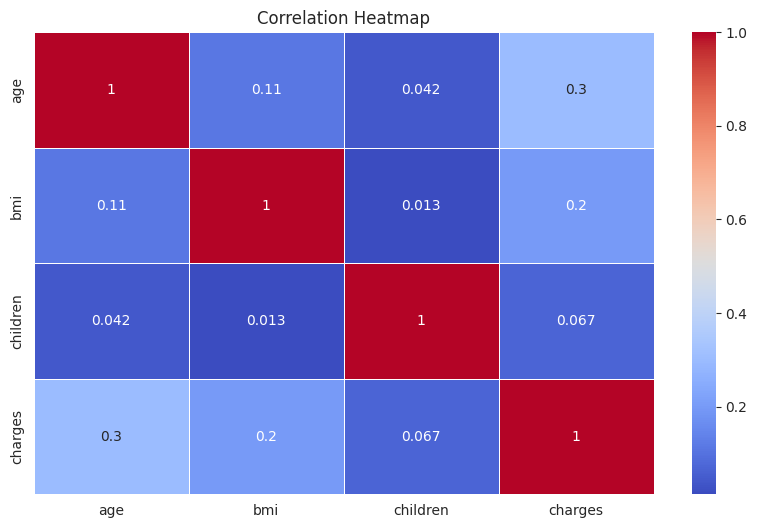

In [28]:
#  7. Correlation & Heatmap
plt.figure(figsize=(10,6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Label Encoding On binary Values and One-Hot Encoding on Categorical Variables

In [29]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary columns
label_enc = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    if df[column].nunique() == 2:
        df[column] = label_enc.fit_transform(df[column])

# One-Hot Encoding for remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

df.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
